In [2]:
import numpy as np
import pandas as pd
%matplotlib inline


import numpy as np

import pandas as pd
import numpy as np
import  seaborn as sns
import rwi as rwi
import math
import  seaborn as sns
from matplotlib import pyplot as plt
import hurst
import statsmodels.api as sm

In [3]:
import FinanceDataReader as fdr

In [569]:
btc = fdr.DataReader('BTC/USD', '2016-01-01')

C:\Users\lexik\.conda\envs\quant\lib\site-packages\FinanceDataReader\investing\data.py:58: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(jo['quotes'])


In [14]:
win = 50
persistent = hurst.random_walk(2000, proba=0.50, min_lookback=win, max_lookback=win)

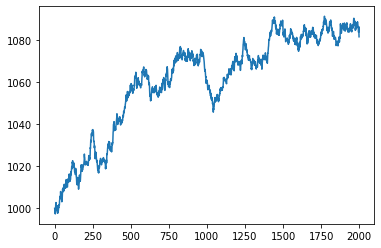

In [15]:
plt.plot(1000+pd.Series(persistent))

In [125]:
persistent

[0.0,
 -0.8384685896082557,
 -1.844231815744895,
 -2.3841451921279466,
 -2.6490067248258553,
 -1.6707943418837137,
 0.24997760895973808,
 1.6936564336915623,
 1.5633775788596365,
 2.7722800007872026,
 1.8756722193021824,
 1.0569295841069581,
 -0.783859525443918,
 -1.0452902588493673,
 -1.0830350069732573,
 0.2757781705629825,
 -0.32674213754591963,
 1.2436349251115268,
 -1.5211499830975572,
 -2.340476249232904,
 -1.3945428846500025,
 -2.0805976105188875,
 -0.9389143611733304,
 -1.5977002193910532,
 -1.1822042193625006,
 0.08762349860273022,
 0.5233842054610173,
 0.32980058797691797,
 1.2010983738590046,
 1.7953181648732754,
 1.3440033358841679,
 1.5983660770009445,
 3.5346174875593634,
 3.996619448046358,
 5.010085336439374,
 4.573116095822272,
 5.292230299679991,
 5.875050393399449,
 5.451892586915131,
 8.022724203261049,
 6.550223481173562,
 5.3207632288129005,
 6.4249641940600215,
 6.0871424743946045,
 6.5664330227954,
 5.144838089621565,
 3.359764488223342,
 3.1317538210737306,
 4.

In [18]:
btc = pd.DataFrame(persistent, columns=['Close'])

In [20]:
tmp = btc.copy()

In [21]:
btc.loc['2019-01-01':]

,Close


In [22]:
rwi.hurst(btc[['Close']])

array([0.51393251])

In [31]:
result = []
for i in range(1, 400):
    result.append(rwi.momersionPeriod(btc['Close'], i))

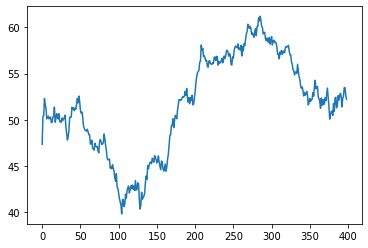

In [32]:
plt.plot(result)

In [34]:
rwi.Momersion(btc.Close.pct_change(1))

47.347347347347345

In [36]:
rwi.MomersionDouble(btc.Close.pct_change(1))

C:\Users\lexik\.conda\envs\quant\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sign
  result = getattr(ufunc, method)(*inputs, **kwargs)


44.68937875751503

In [57]:
result = []
for i in range(1, 500):
    val = rwi.autoCorrel(btc['Close'].pct_change(i).replace([np.inf, -np.inf], np.nan).fillna(0), 1)
    result.append(val)
    

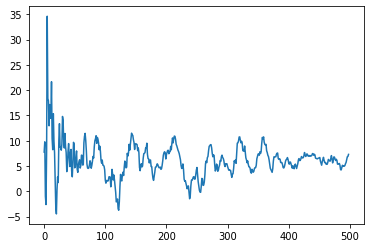

In [58]:
plt.plot(result)

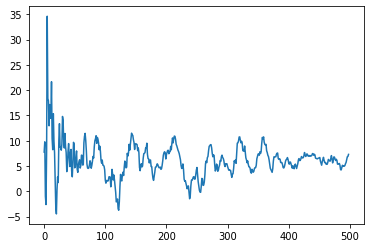

In [59]:
plt.plot(result)

In [60]:
p_ = 2
ts_ = btc.Close
ts_1 = np.sign(ts_.pct_change(p_).fillna(0))
ts_2 = np.sign(ts_.pct_change(p_).shift(p_).fillna(0))

val = ts_1 * ts_2
pos = len(val[val == 1])
neg = len(val[val == -1])


mom = (pos/(pos+neg)) * 100.0

In [61]:
mom

50.35070140280561

In [62]:
def momersionPeriod(ts_, p_):
    ts_1 = np.sign(ts_.pct_change(p_).fillna(0))
    ts_2 = np.sign(ts_.pct_change(p_).shift(p_).fillna(0))
    
    val = ts_1 * ts_2
    pos = len(val[val == 1])
    neg = len(val[val == -1])
    if pos + neg == 0:
        return 0
   
    mom = (pos/(pos+neg)) * 100.0
    return mom

In [64]:
momersionPeriod(btc['Close'], 3)

50.45135406218656

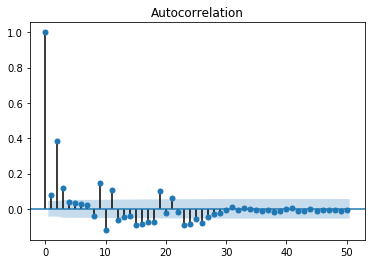

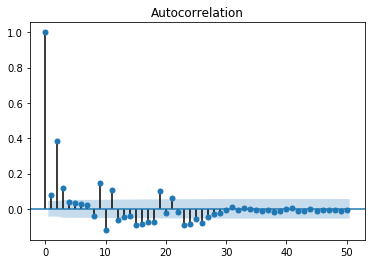

In [115]:
sm.graphics.tsa.plot_acf(pd.Series(btc.Close).fillna(0).pct_change(5).replace([np.inf, -np.inf], np.nan).fillna(0), lags=50)

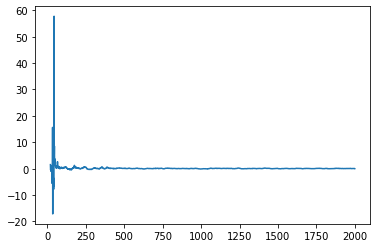

In [73]:
pd.Series(btc.Close).pct_change(20).plot()

In [79]:
rwi.marketMeannes(btc.Close.pct_change(300).fillna(0))

0.4432216108054027

In [355]:
### trading strategy

In [570]:
btc

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2016-01-01,433.98,429.02,436.49,426.26,12970.0,0.0116
2016-01-02,432.70,433.98,435.79,430.00,6380.0,-0.0029
2016-01-03,428.66,432.70,433.07,422.00,19180.0,-0.0093
2016-01-04,432.90,428.64,435.67,426.97,13020.0,0.0099
2016-01-05,431.84,432.90,434.91,428.22,11220.0,-0.0024
...,...,...,...,...,...,...
2020-03-21,6201.80,6211.10,6461.00,5884.70,12940.0,-0.0006
2020-03-22,5827.05,6202.70,6410.60,5757.30,16280.0,-0.0604
2020-03-23,6491.20,5820.10,6652.40,5682.70,19550.0,0.1140


In [80]:
btc['returns'] = btc[['Close']].pct_change(1).fillna(0)
btc['returns2'] = btc[['Close']].pct_change(1).fillna(0).shift(1).fillna(0)
btc['entry'] = np.sign(btc['returns'] * btc.returns2)
btc['entry'] = btc['entry'].shift(1)
btc['res'] = np.sign(btc['returns'] * btc.returns2)

C:\Users\lexik\.conda\envs\quant\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sign
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [81]:
btc

,Close,returns,returns2,entry,res
0,0.000000,0.000000,0.000000,NaN,0.0
1,-0.838469,-inf,0.000000,0.0,NaN
2,-1.844232,1.199524,-inf,NaN,-1.0
3,-2.384145,0.292758,1.199524,-1.0,1.0
4,-2.649007,0.111093,0.292758,1.0,1.0
...,...,...,...,...,...
1995,85.829459,-0.004897,0.003100,-1.0,-1.0
1996,83.847531,-0.023091,-0.004897,-1.0,1.0
1997,86.528634,0.031976,-0.023091,1.0,-1.0
1998,82.823269,-0.042822,0.031976,-1.0,-1.0


In [573]:
btc['val'] = btc.res.fillna(0) *  btc.returns

In [574]:
btc.loc['2016-01-01':'2019-01-01'].val.mean()

0.0026644313470229725

C:\Users\lexik\.conda\envs\quant\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


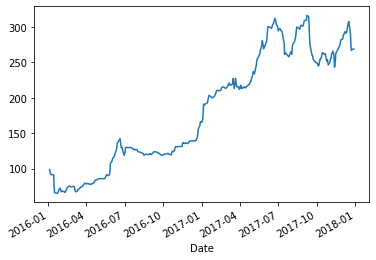

In [575]:
a = (100.0 +(100.0 * btc.loc['2016-01-01':'2018-01-01'][btc.entry==1].val).cumsum()).plot()

In [579]:
btc.loc['2016-01-01':'2018-01-01'].val.std()

0.04034883093618335

In [580]:
## optimize

In [592]:
btc

,Close,Open,High,Low,Volume,Change,returns,returns2,entry,res,val,shift_returns
Date,,,,,,,,,,,,
2016-01-01,433.98,429.02,436.49,426.26,12970.0,0.0116,0.000000,0.000000,NaN,0.0,0.000000,-0.002949
2016-01-02,432.70,433.98,435.79,430.00,6380.0,-0.0029,-0.002949,0.000000,0.0,0.0,-0.000000,-0.009337
2016-01-03,428.66,432.70,433.07,422.00,19180.0,-0.0093,-0.009337,-0.002949,0.0,1.0,-0.009337,0.009891
2016-01-04,432.90,428.64,435.67,426.97,13020.0,0.0099,0.009891,-0.009337,1.0,-1.0,-0.009891,-0.002449
2016-01-05,431.84,432.90,434.91,428.22,11220.0,-0.0024,-0.002449,0.009891,-1.0,-1.0,0.002449,-0.008915
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-21,6201.80,6211.10,6461.00,5884.70,12940.0,-0.0006,-0.000645,0.005248,1.0,-1.0,0.000645,-0.060426
2020-03-22,5827.05,6202.70,6410.60,5757.30,16280.0,-0.0604,-0.060426,-0.000645,-1.0,1.0,-0.060426,0.113977
2020-03-23,6491.20,5820.10,6652.40,5682.70,19550.0,0.1140,0.113977,-0.060426,1.0,-1.0,-0.113977,0.041718


In [180]:
def optimize(ts, period):
    
    ts['returns'] = ts[['Close']].pct_change(period).replace([np.inf, -np.inf], np.nan).fillna(0)
    ts['returns2'] = ts[['Close']].pct_change(period).replace([np.inf, -np.inf], np.nan).fillna(0).shift(1).fillna(0)
    
    ts['entry'] = np.sign(ts['returns'] * ts.returns2 )
    #ts['entry'] = ts['entry'].shift(1).fillna(0)
    ts['direction'] = np.sign(ts.returns) * (-1)
    ts['shift_Change'] = ts['Change'].shift(-1).replace([np.inf, -np.inf], np.nan).fillna(0)
    ts['shift_returns'] = ts.returns.shift(-1).replace([np.inf, -np.inf], np.nan).fillna(0)
    ts['val'] = ts.shift_Change * ts.direction
    
    return ts[(ts.entry==1) & (ts.val>0)].val.sum() / ts[(ts.entry==1) & (ts.val < 0)].val.abs().sum() #cumsum().dropna()

In [181]:
def optimize_plot(ts, period):
    
    ts['returns'] = ts[['Close']].pct_change(period).replace([np.inf, -np.inf], np.nan).fillna(0)
    ts['returns2'] = ts[['Close']].pct_change(period).replace([np.inf, -np.inf], np.nan).fillna(0).shift(1).fillna(0)
    
    ts['entry'] = np.sign(ts['returns'] * ts.returns2 )
    #ts['entry'] = ts['entry'].shift(1).fillna(0)
    ts['direction'] = np.sign(ts.returns) * (-1.0)
    ts['shift_Change'] = ts['Change'].shift(-1).replace([np.inf, -np.inf], np.nan).fillna(0)
    ts['shift_returns'] = ts.returns.shift(-1).replace([np.inf, -np.inf], np.nan).fillna(0)
    ts['val'] = ts.shift_returns * ts.direction
    
    return ts #ts[(ts.entry==1) & (ts.val>0)].val.sum() / ts[(ts.entry==1) & (ts.val < 0)].val.abs().sum() #cumsum().dropna()

In [137]:
btc['Change'] = btc.returns

In [182]:
result = []
for i in range(1, 500):
    val = optimize(btc[['Close', 'Change']], i)
    result.append((i, val))
    

C:\Users\lexik\.conda\envs\quant\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lexik\.conda\envs\quant\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\lexik\.conda\envs\quant\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [183]:
df = pd.DataFrame(result)[1]

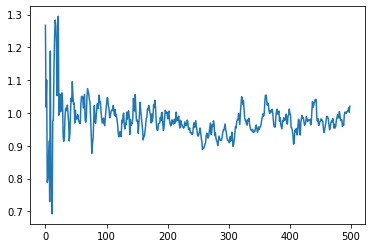

In [184]:
df[0:500].plot()

C:\Users\lexik\.conda\envs\quant\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lexik\.conda\envs\quant\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\lexik\.conda\envs\quant\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

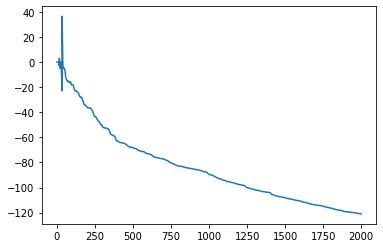

In [185]:
optimize_plot(btc[['Close', 'Change']], 11).val.cumsum().plot()